In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('Datasets/invesments.csv')
df.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Sector,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Argentina,AR,ARG,CO2 emissions in exports of domestic controlle...,Metric tons of CO2,"OECD (2022), OECD FDI Statistics Database, [ht...",ECBIXD,CO2 Emissions in Exports; Of which: Exports of...,"Environment, Climate Change, Cross-Border, Dir...",Accommodation and food services,...,71.211434,83.558460,79.534370,64.993731,57.385115,59.141641,56.846428,14.668454,NaN,NaN
1,Argentina,AR,ARG,CO2 emissions in exports of domestic controlle...,Metric tons of CO2,"OECD (2022), OECD FDI Statistics Database, [ht...",ECBIXD,CO2 Emissions in Exports; Of which: Exports of...,"Environment, Climate Change, Cross-Border, Dir...","Agriculture, forestry and fishing",...,1433.655594,2022.159504,2244.337944,1916.677540,1874.305223,1442.325438,1216.817160,1229.891696,NaN,NaN
2,Argentina,AR,ARG,CO2 emissions in exports of domestic controlle...,Metric tons of CO2,"OECD (2022), OECD FDI Statistics Database, [ht...",ECBIXD,CO2 Emissions in Exports; Of which: Exports of...,"Environment, Climate Change, Cross-Border, Dir...","Arts, entertainment, recreation and other serv...",...,32.800418,32.363177,31.128261,26.751951,26.115516,26.143714,22.016188,25.395741,NaN,NaN
3,Argentina,AR,ARG,CO2 emissions in exports of domestic controlle...,Metric tons of CO2,"OECD (2022), OECD FDI Statistics Database, [ht...",ECBIXD,CO2 Emissions in Exports; Of which: Exports of...,"Environment, Climate Change, Cross-Border, Dir...",Basic metals,...,67.456211,89.201459,91.336366,82.703299,77.160579,74.335338,60.709666,47.939953,NaN,NaN
4,Argentina,AR,ARG,CO2 emissions in exports of domestic controlle...,Metric tons of CO2,"OECD (2022), OECD FDI Statistics Database, [ht...",ECBIXD,CO2 Emissions in Exports; Of which: Exports of...,"Environment, Climate Change, Cross-Border, Dir...",Chemicals and pharmaceutical products,...,158.404920,169.111172,203.536455,222.669928,210.962388,229.553929,219.951865,223.918129,NaN,NaN


In [3]:
df['Indicator'].unique()

array(['CO2 emissions in exports of domestic controlled enterprises',
       'CO2 emissions in exports of foreign controlled multinational enterprises',
       'CO2 emissions in output of domestic controlled enterprises',
       'CO2 emissions in output of foreign controlled multinational enterprises',
       'CO2 emissions per unit of output for foreign controlled multinational enterprises',
       'CO2 emissions per unit of output of domestic controlled enterprises',
       'CO2 emissions in gross fixed capital formation of direct investment in resident operating units (non-SPEs)',
       'CO2 emissions in gross fixed capital formation of direct investment in resident operating units (non-SPEs) to final demand ratio'],
      dtype=object)

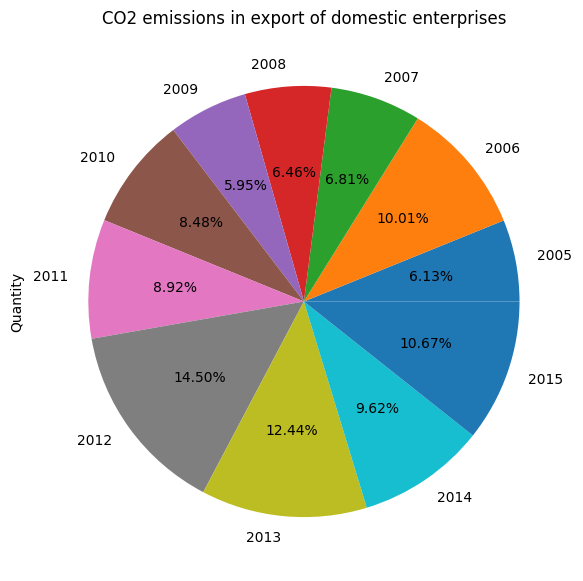

In [4]:
df_domestics_chemistry = df.query("Indicator == 'CO2 emissions in exports of domestic controlled enterprises' and Sector == 'Chemicals and pharmaceutical products'")
sm = df_domestics_chemistry.sum()
tempDf = pd.DataFrame({'Years': ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
                   'Quantity': [sm['2005'], sm['2006'], sm['2007'], sm['2008'], sm['2009'], sm['2010'], sm['2011'],sm['2012'],sm['2013'],sm['2014'],sm['2015'],]})
# create a pie chart
tempDf.plot.pie(y='Quantity', 
                labels=tempDf['Years'],
                legend=False, figsize=(7, 7),
                title="CO2 emissions in export of domestic enterprises",
                autopct='%1.2f%%')
plt.show()

In [5]:
## Time series
fig = px.line(tempDf, x='Years', y="Quantity", title="Domestic Companies")
fig.show()

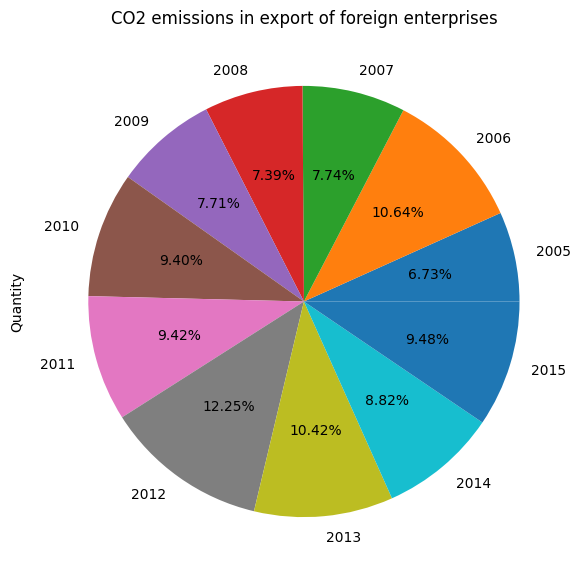

In [6]:
df_foreign_chemistry = df.query("Indicator == 'CO2 emissions in exports of foreign controlled multinational enterprises' and Sector == 'Chemicals and pharmaceutical products'")
sm = df_foreign_chemistry.sum()
tempDf = pd.DataFrame({'Years': ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
                   'Quantity': [sm['2005'], sm['2006'], sm['2007'], sm['2008'], sm['2009'], sm['2010'], sm['2011'],sm['2012'],sm['2013'],sm['2014'],sm['2015'],]})
# create a pie chart
tempDf.plot.pie(y='Quantity', 
                labels=tempDf['Years'],
                legend=False, figsize=(7, 7),
                title="CO2 emissions in export of foreign enterprises",
                autopct='%1.2f%%')
plt.show()

In [7]:
## Time series
fig = px.line(tempDf, x='Years', y="Quantity", title="Foreign Companies")
fig.show()

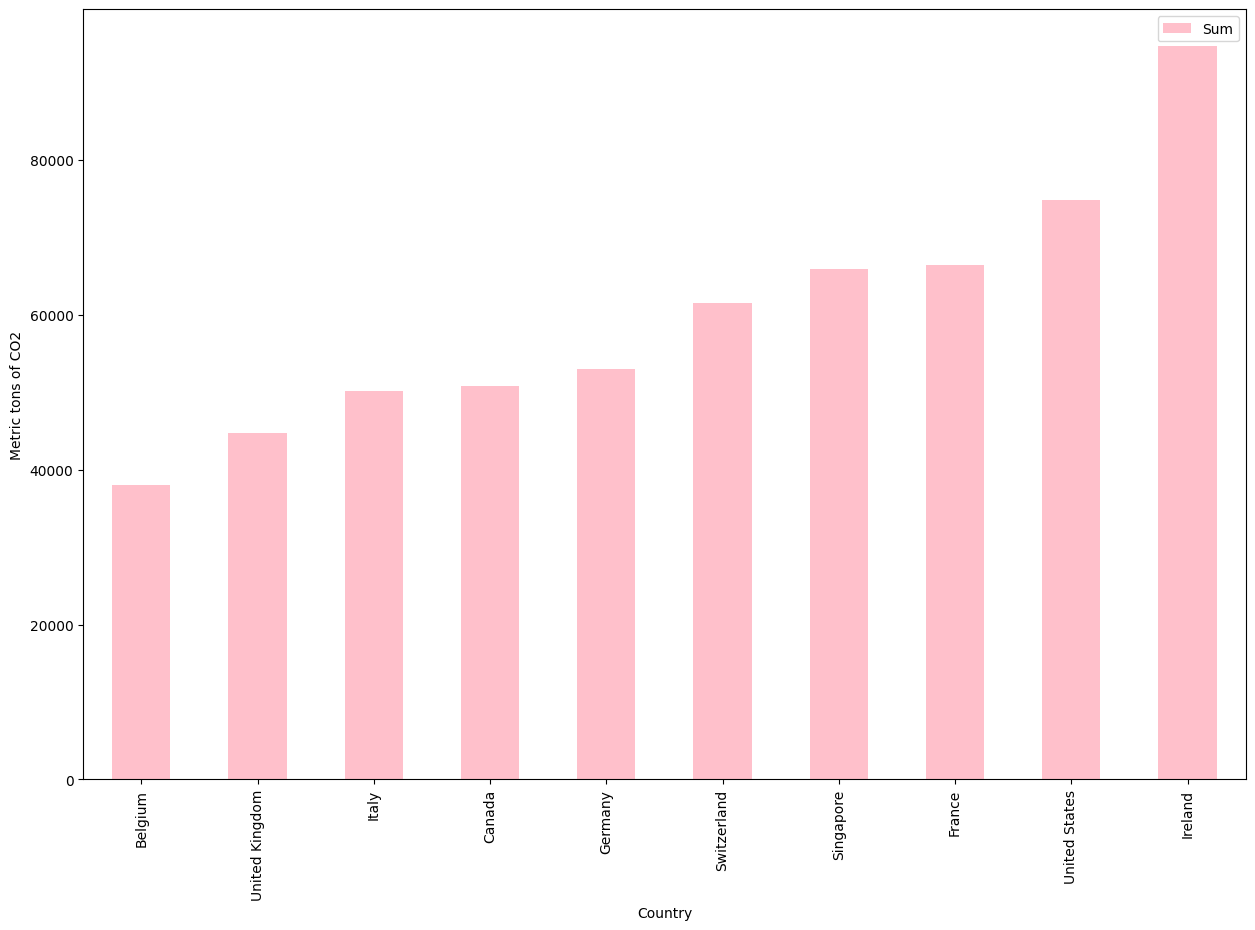

In [8]:
df_foreign_chemistry = df.query("Indicator == 'CO2 emissions in exports of foreign controlled multinational enterprises' and Sector == 'Chemicals and pharmaceutical products'")

countries = []
sums = []
# iterate through the rows of the DataFrame
for index, row in df_foreign_chemistry.iterrows():
    # access data for each column by column name
    countries.append(row["Country"])
    total = 0
    total += row["2005"] + row["2006"] +row["2007"] +row["2008"] +row["2009"] +row["2010"] +row["2011"] +row["2012"] +row["2013"] +row["2014"] +row["2015"]
    sums.append(total)
    
tempDf = pd.DataFrame({'Country': countries, 'Sum': sums})
tempDf = tempDf.sort_values('Sum')
tempDf = tempDf.tail(10)
tempDf.plot.bar(figsize=(15,10), y="Sum", x="Country", ylabel="Metric tons of CO2", color="pink")
plt.show()

In [9]:
dfTemp = df.query("Indicator == 'CO2 emissions in exports of domestic controlled enterprises' and Sector == 'Chemicals and pharmaceutical products'")
fig = px.choropleth(dfTemp, locations="ISO3",
                    color="2015", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale="Sunsetdark",
                   title= "CO2 emissions in exports of domestic controlled enterprises on 2015")
fig.show()